## Demonstrating the Born Rule

<img src="images/Born-rule.png" width="250" align="left"/>

The **Born rule** states that measurement probabilities are given by the squared amplitudes of a quantum state.  
For a qubit $|S\rangle = a|0\rangle + b|1\rangle$, with the normalization constraint $a^2 + b^2 = 1$, the probability of recording the classical result **0** is $P(0) = |a|^2$, and the probability of recording **1** is $P(1) = |b|^2$. 


In this lab we prepare a qubit state for chosen values of $a$ and $b$, measure it repeatedly, and compare the observed frequencies with these predictions.  
<br clear="left"/>

### Task
Prepare a single-qubit state as $|S\rangle = 0.6|0\rangle + 0.8|1\rangle$.  
Simulate repeated measurements in the computational (Z) basis and compare the observed frequencies with the theoretical probabilities predicted by the Born rule.  

### Expected Output
- Theoretical probabilities calculated from the given amplitudes.  
- A dictionary of observed measurement counts.  
- A dictionary of observed measurement probabilities.  
- A probability distribution plot showing measured vs. theoretical probabilities.  

The results should confirm that the empirical frequencies are close to the probabilities predicted by the Born rule.  

### Optional Challenge
- Repeat the experiment with different values of $a$ and $b$ and compare the results.  
- Increase the number of shots (e.g., 10,000) to see how the observed frequencies converge more closely to the theoretical values.  
- Add a numerical check by calculating the relative error or confidence interval for each probability.  

Expected probabilities for a=0.60 and b=0.80: P(0)=0.36, P(1)=0.64
Observed measurement counts (1000 shots): {'0': 364, '1': 636}
Observed measurement probabilities (1000 shots): {'0': 0.364, '1': 0.636}


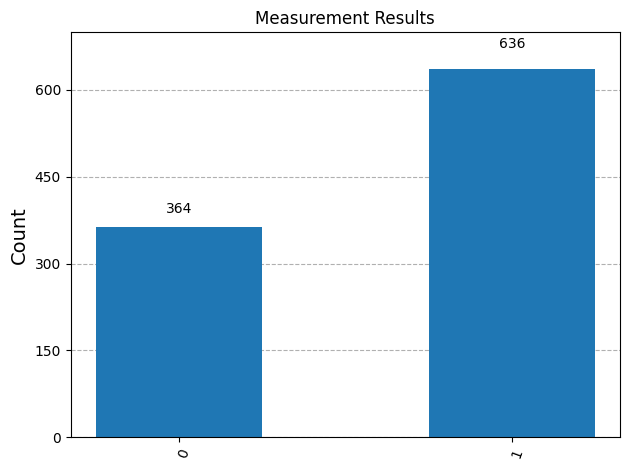

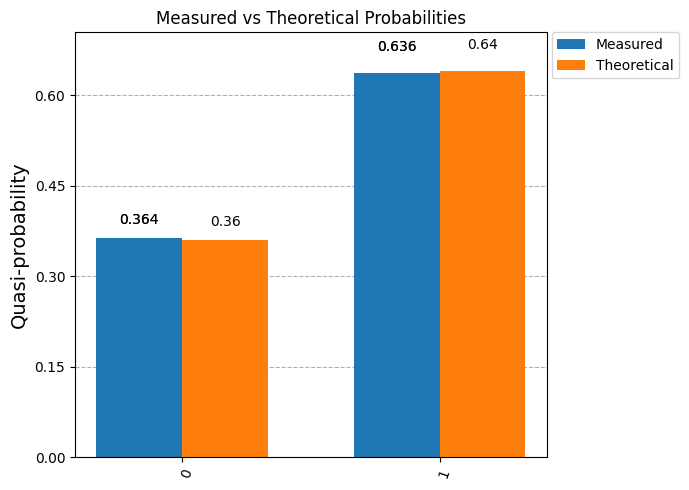

In [6]:
from IPython.display import display

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_distribution
import numpy as np

# 1. Define the qubit state |S⟩ = 0.6|0⟩ + 0.8|1⟩

a = 0.6               # pick a coefficient for |0>
b = np.sqrt(1 - a**2) # ensure normalization for |1>
                      # Calculate theoretical probabilities from Born rule
theoretical_probs = {'0': a**2, '1': b**2}
state = Statevector([a, b]) # set the state vector

# 2. Simulate measurements in the computational (Z) basis
shots = 1000
counts = state.sample_counts(shots=shots)

# 3. Convert result to native Python types & counts to probabilities
py_counts = {str(k): int(v) for k, v in counts.items()}
measured_probs = {outcome: value/shots for outcome, value in py_counts.items()}

# 4. Print results
print(f"Expected probabilities for a={a:.2f} and b={b:.2f}: P(0)={a**2:.2f}, P(1)={b**2:.2f}")
print(f"Observed measurement counts ({shots} shots):", py_counts)
print(f"Observed measurement probabilities ({shots} shots):", measured_probs)

# 5. Plot histogram of observed and theoretical distribution
display(plot_histogram(py_counts, title="Measurement Results"))
display(
    plot_distribution(
        [measured_probs, theoretical_probs],
        title="Measured vs Theoretical Probabilities",
        legend=["Measured", "Theoretical"]
    )
)